## LAB - 2
**Class Task -**
1. Single Layer Perceptron for Pattern Recognition .
2. Implementing Multi-Layer Perceptron.

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize a Multi-layer Perceptron classifier with no hidden layers
model = MLPClassifier(hidden_layer_sizes=(), activation='relu', solver='adam', max_iter=1000, random_state=42)

# Train the model using the training data
model.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.91


C:\Users\piyus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


##### Use of Sigmoid Activation Function

In [ ]:
# Initialize a Multi-layer Perceptron classifier with sigmoid activation function
model = MLPClassifier(hidden_layer_sizes=(), activation='logistic', solver='adam', max_iter=1000, random_state=42)

# Train the model using the training data
model.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.91


C:\Users\piyus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


##### Implement the perceptron in the for Pattern Recognition

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

class Perceptron:
    def __init__(self, learning_rate=0.01, n_iter=1000):
        self.learning_rate = learning_rate
        self.n_iter = n_iter

    def fit(self, X, y):
        # Initialize weights and bias
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        for _ in range(self.n_iter):
            for i in range(X.shape[0]):
                # Compute the linear combination
                linear_output = np.dot(X[i], self.weights) + self.bias
                # Apply the step activation function
                y_pred = self._step_function(linear_output)
                # Update weights and bias
                self.weights += self.learning_rate * (y[i] - y_pred) * X[i]
                self.bias += self.learning_rate * (y[i] - y_pred)

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self._step_function(linear_output)

    def _step_function(self, x):
        return np.where(x >= 0, 1, 0)

# Load and prepare the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Convert to binary classification (class 0 vs class 1)
y = np.where(y == 0, 0, 1)

# Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the Perceptron
perceptron = Perceptron(learning_rate=0.01, n_iter=1000)
perceptron.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = perceptron.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.98


#### Multiple Layer Perceptron

Accuracy: 1.00


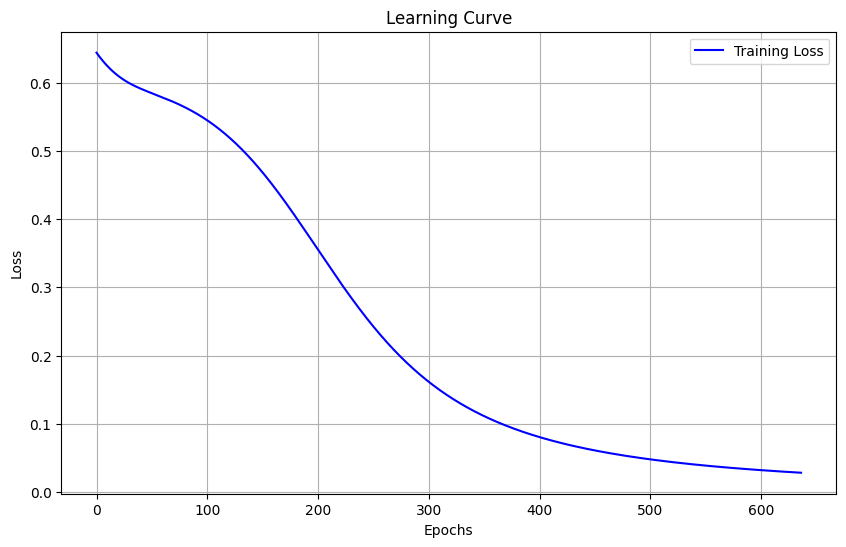

In [ ]:
import matplotlib.pyplot as plt
# Initialize a Multi-layer Perceptron classifier with hidden layers
# Example: (10, 20) means 2 hidden layers: the first with 10 neurons and the second with 20 neurons
model = MLPClassifier(hidden_layer_sizes=(10, 20), activation='logistic', solver='adam', max_iter=1000, random_state=42)

# Train the model using the training data
model.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Plot the learning curve

plt.figure(figsize=(10, 6))
plt.plot(model.loss_curve_, label='Training Loss', color='blue')
plt.title('Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()